### 심장병 분류
> https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### features
- age - 나이
- sex - 성별
- cp - 흉통 종류
- trtbps - 안정시 혈압
- chol - 콜레스테롤
- fbs - 공복혈당
- restecg - 휴식중 심전도 결과
- thalachh - 최대심박수
- exng - 협심증
- oldpeak - 운동부하
- slp - 심장 전기활동
- caa - 주요 혈관 수
- thall - 방사성 동위원소
- output - 심장병 여부(target)

In [1]:
import pandas as pd

h_df_origin = pd.read_csv('./datasets/heart.csv')
h_df = h_df_origin.copy()
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
h_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
h_df.duplicated().sum()

1

In [5]:
h_df = h_df.drop_duplicates()
h_df.duplicated().sum()

0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

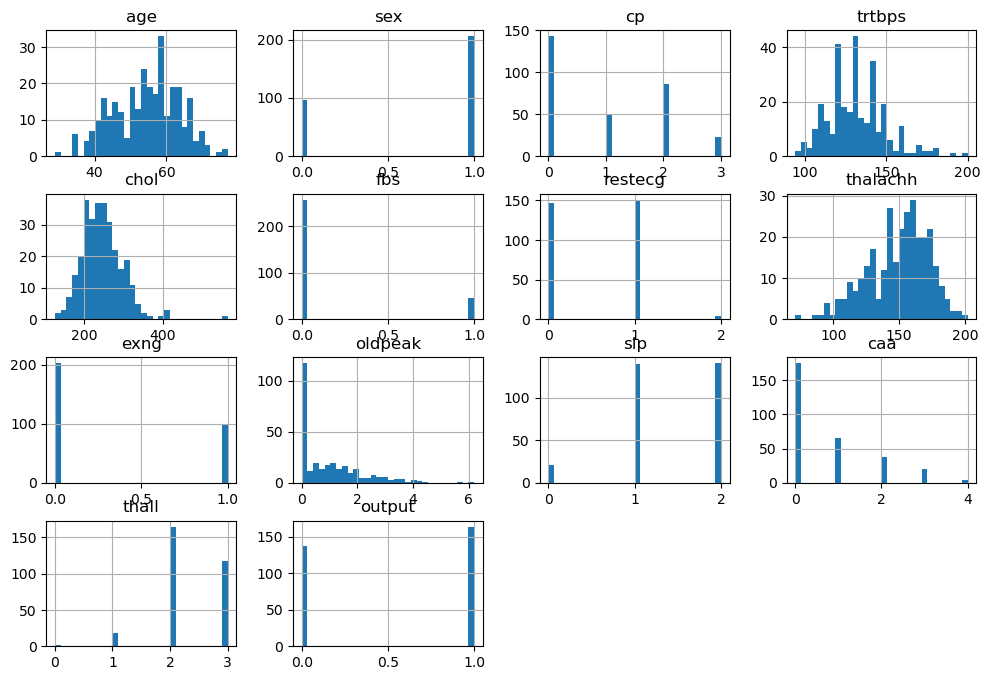

In [6]:
h_df.hist(figsize=(12, 8), bins=30)

In [7]:
h_df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [9]:
features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

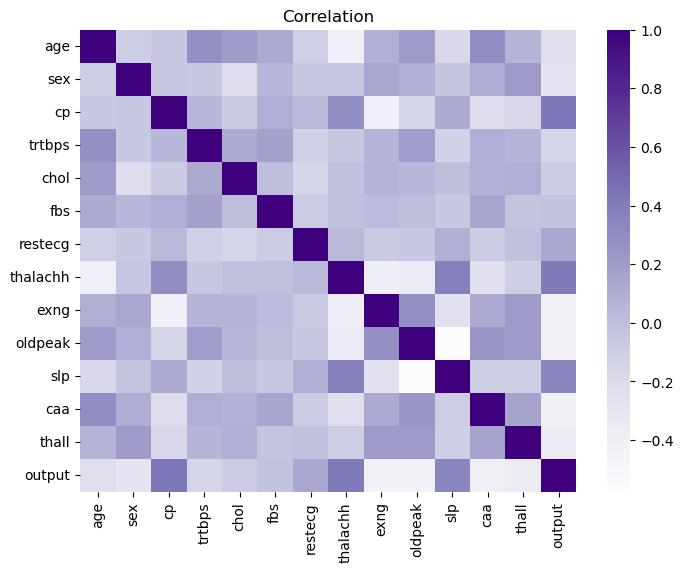

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = h_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [11]:
get_vif(features)

,vif_score,feature
0,39.567644,age
1,3.507112,sex
2,2.409980,cp
3,58.776923,trtbps
4,26.281421,chol
5,1.273256,fbs
6,2.051037,restecg
7,42.631809,thalachh
8,2.022825,exng
9,3.071361,oldpeak


In [12]:
corr.output.sort_values(ascending=False)[1:]

cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

In [13]:
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


- trtbps의 vif스코어가 가장 높아서 확인해보았으나 다른피쳐와의 상관관계가 낮아 다음으로 vif스코어가 높은  
  thalachh를 확인해보았는데 몇개의 독립변수들과의 상관관계가 0.4가까이 되는것을 확인하였습니다.  
  하지만 thalachh 자체는 타겟과의 관계가 높은편이라 thalachh와 관계가 크고 타겟과의 관계가 작은 age피쳐를 제거합니다.

In [14]:
pre_h_df = h_df.drop(labels=['age'], axis=1)
pre_h_df

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

In [16]:
get_vif(features)

,vif_score,feature
0,3.507104,sex
1,2.403339,cp
2,42.813421,trtbps
3,23.788225,chol
4,1.272912,fbs
5,2.044861,restecg
6,42.482756,thalachh
7,2.022355,exng
8,3.055238,oldpeak
9,9.960336,slp


In [17]:
pre_h_df.corr().output.sort_values(ascending=False)[1:]

cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

In [18]:
pre_h_df.corr()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146
slp,-0.032990,0.116854,-0.122873,0.000417,-0.058654,0.090402,0.384754,-0.256106,-0.576314,1.000000,-0.092236,-0.103314,0.343940


- 타겟과의 상관관계가 0.1도 되지않는 fbs와 chol피쳐 제거

In [19]:
pre_h_df = pre_h_df.drop(labels=['fbs', 'chol'], axis=1)
pre_h_df

,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,3,145,0,150,0,2.3,0,0,1,1
1,1,2,130,1,187,0,3.5,0,0,2,1
2,0,1,130,0,172,0,1.4,2,0,2,1
3,1,1,120,1,178,0,0.8,2,0,2,1
4,0,0,120,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,1,123,1,0.2,1,0,3,0
299,1,3,110,1,132,0,1.2,1,0,3,0
300,1,0,144,1,141,0,3.4,1,2,3,0
301,1,0,130,1,115,1,1.2,1,1,3,0


In [20]:
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]
get_vif(features)

,vif_score,feature
0,3.365299,sex
1,2.364969,cp
2,36.863315,trtbps
3,2.018949,restecg
4,39.287291,thalachh
5,1.996700,exng
6,3.016282,oldpeak
7,9.814842,slp
8,1.726323,caa
9,16.248407,thall


In [21]:
pre_h_df.corr().output.sort_values(ascending=False)[1:]

cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
trtbps     -0.146269
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

In [22]:
pre_h_df.corr()

,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,1.000000,-0.051740,-0.057647,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.051740,1.000000,0.046486,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,-0.057647,0.046486,1.000000,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
restecg,-0.060351,0.041561,-0.115367,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.046439,0.293367,-0.048023,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.143460,-0.392937,0.068526,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.098322,-0.146692,0.194600,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146
slp,-0.032990,0.116854,-0.122873,0.090402,0.384754,-0.256106,-0.576314,1.000000,-0.092236,-0.103314,0.343940
caa,0.113060,-0.195356,0.099248,-0.083112,-0.228311,0.125377,0.236560,-0.092236,1.000000,0.160085,-0.408992
thall,0.211452,-0.160370,0.062870,-0.010473,-0.094910,0.205826,0.209090,-0.103314,0.160085,1.000000,-0.343101


- 타겟과의 상관관계가 낮으면서 다른 피쳐와의 관계가 조금 더 높은 trtbps 피쳐 제거

In [23]:
pre_h_df = pre_h_df.drop(labels=['trtbps'], axis=1)
pre_h_df

,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,3,0,150,0,2.3,0,0,1,1
1,1,2,1,187,0,3.5,0,0,2,1
2,0,1,0,172,0,1.4,2,0,2,1
3,1,1,1,178,0,0.8,2,0,2,1
4,0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,123,1,0.2,1,0,3,0
299,1,3,1,132,0,1.2,1,0,3,0
300,1,0,1,141,0,3.4,1,2,3,0
301,1,0,1,115,1,1.2,1,1,3,0


In [24]:
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]
get_vif(features)

,vif_score,feature
0,3.357678,sex
1,2.333443,cp
2,2.018568,restecg
3,22.834630,thalachh
4,1.906363,exng
5,2.781007,oldpeak
6,9.721258,slp
7,1.691469,caa
8,15.140299,thall


- vif수치가 15, 22인 피쳐가 있지만 더이상 제거하기엔 너무 적어져서 일단 진행 해보기로 한다.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_features = lda.fit_transform(pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1])

lda_columns = [f'lda{i + 1}' for i in range(lda_features.shape[1])]

lda_df = pd.DataFrame(lda_features, columns=lda_columns)

lda_df.loc[:, 'target'] = h_df.iloc[:, -1]
lda_df

,lda1,target
0,-0.949914,1.0
1,-0.394441,1.0
2,-1.409988,1.0
3,-1.163115,1.0
4,-0.714664,1.0
...,...,...
297,0.467434,0.0
298,-0.570634,0.0
299,2.074090,0.0
300,1.975806,0.0


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [27]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [28]:
lda_df.target.value_counts()

target
1.0    164
0.0    137
Name: count, dtype: int64

In [29]:
lda_df.isna().sum()

lda1      0
target    1
dtype: int64

In [30]:
lda_df = lda_df[~lda_df['target'].isna()].reset_index(drop=True)
lda_df

,lda1,target
0,-0.949914,1.0
1,-0.394441,1.0
2,-1.409988,1.0
3,-1.163115,1.0
4,-0.714664,1.0
...,...,...
296,0.467434,0.0
297,-0.570634,0.0
298,2.074090,0.0
299,1.975806,0.0


#### Pytorch

In [31]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = lda_df.iloc[:, :-1], lda_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

logistic_r = Sequential(
    Linear(1, 1),
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=0.000001)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)

    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss.item(), 4)}')
        print('=' * 90)

Epoch: 1000/10000
W1: -0.6949, b: 0.0
Loss: 0.4546
Epoch: 2000/10000
W1: -0.6951, b: 0.0
Loss: 0.4546
Epoch: 3000/10000
W1: -0.6953, b: 0.0
Loss: 0.4546
Epoch: 4000/10000
W1: -0.6955, b: 0.0
Loss: 0.4545
Epoch: 5000/10000
W1: -0.6957, b: 0.0
Loss: 0.4545
Epoch: 6000/10000
W1: -0.6958, b: 0.0
Loss: 0.4545
Epoch: 7000/10000
W1: -0.696, b: 0.0
Loss: 0.4544
Epoch: 8000/10000
W1: -0.6962, b: 0.0
Loss: 0.4544
Epoch: 9000/10000
W1: -0.6964, b: 0.0
Loss: 0.4544
Epoch: 10000/10000
W1: -0.6966, b: 0.0
Loss: 0.4543


In [32]:
get_evaluation(y_test.detach(), logistic_r(X_test) >= 0.5)

오차 행렬
[[22  6]
 [ 1 32]]
정확도: 0.8852, 정밀도: 0.8421, 재현율: 0.9697, F1: 0.9014, ROC-AUC: 0.8777
################################################################################


In [33]:
from sklearn.model_selection import train_test_split

# 데이터 분리
features, targets = lda_df.iloc[:, :-1], lda_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(random_state=124)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=124)

In [35]:
# from sklearn.tree import export_graphviz

# unique_labels = lda_df['target'].unique()

# # 클래스 레이블 리스트로 변환
# class_labels = [str(label) for label in unique_labels]

# export_graphviz(
#     dtc, 
#     out_file='./images/hearts01.dot', 
#     class_names=class_labels, 
#     feature_names=features.columns, 
#     impurity=True, 
#     filled=True
# )

In [36]:
# import graphviz

# with open('./images/hearts01.dot') as f:
#     hearts_dtc01 = f.read()

# hearts_dtc01_graph = graphviz.Source(hearts_dtc01)

In [37]:
# hearts_dtc01_graph.render(filename='hearts01', directory='./images', format='png')

<img src='./images/hearts01.png'>

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    # max_depth : 결정트리의 최대 깊이, 깊을수록 모델은 더 복잡해지고, 더 적합해지지만 과적합의 위험이 있다.
    'max_depth': [15, 16, 17, 18, 19, 20], 
    # min_samples_split : 노드를 분할할 최소 샘플 수, 값이 높을수록 트리를 일반화하고, 모델의 안정성을 향상시킴
    # 적절한 값은 모델의 일반화 성능이 향상되고, 과적합을 방지한다.
    'min_samples_split': [20, 30, 40]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20],
                         'min_samples_split': [20, 30, 40]})

In [40]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 15, 'min_samples_split': 20}",0.804167,14
1,"{'max_depth': 15, 'min_samples_split': 30}",0.820833,7
2,"{'max_depth': 15, 'min_samples_split': 40}",0.829167,1
3,"{'max_depth': 16, 'min_samples_split': 20}",0.808333,13
4,"{'max_depth': 16, 'min_samples_split': 30}",0.820833,7
5,"{'max_depth': 16, 'min_samples_split': 40}",0.825000,2
6,"{'max_depth': 17, 'min_samples_split': 20}",0.795833,17
7,"{'max_depth': 17, 'min_samples_split': 30}",0.825000,2
8,"{'max_depth': 17, 'min_samples_split': 40}",0.816667,9
9,"{'max_depth': 18, 'min_samples_split': 20}",0.795833,16


In [41]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[23  5]
 [ 1 32]]
정확도: 0.9016, 정밀도: 0.8649, 재현율: 0.9697, F1: 0.9143, ROC-AUC: 0.8956
################################################################################


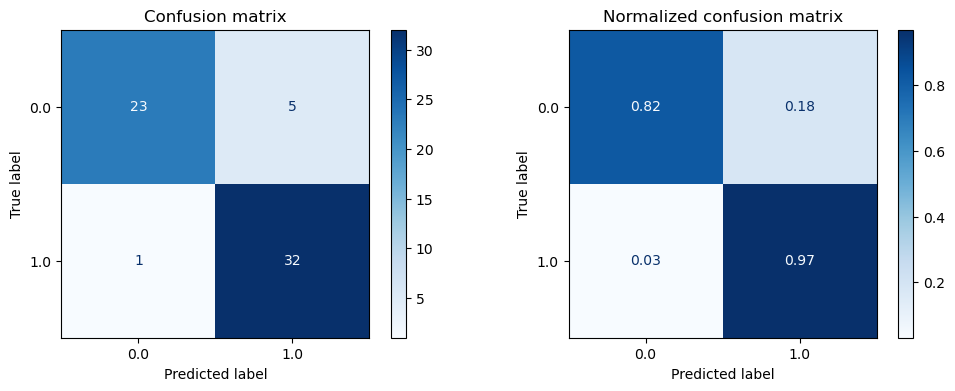

In [42]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    # n_estimators가 높을수록 모델이 복잡해지고 과적합 위험이 있다
    'n_estimators': [50, 100, 150],
    # learning_rate : 각 트리의 가중치를 부여한다. 낮을수록 모델이 안정적이고 과적합의 위험을 줄여준다.
    # 하지만 낮을수록 트리가 더 많이 필요할 수 있다.
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [44]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.7375,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.7375,1
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.7375,1
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.7375,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.7375,1
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.7375,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.7375,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.7375,1
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.7375,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.7375,1


In [45]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[23  5]
 [ 8 25]]
정확도: 0.7869, 정밀도: 0.8333, 재현율: 0.7576, F1: 0.7937, ROC-AUC: 0.7895
################################################################################


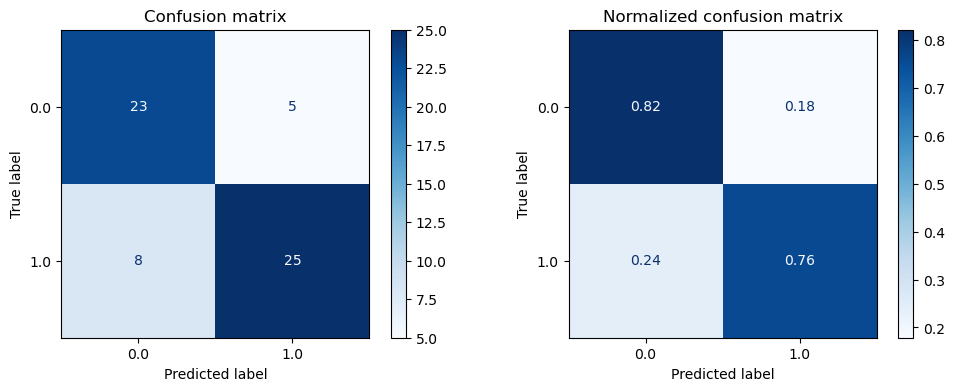

In [46]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

In [47]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

# early_stopping_rounds : 값만큼 연속으로 성능이 향상되지 않으면 훈련을 조기 종료
# eval_set : 조기 중단을 위해 사용될 검증 데이터셋을 지정
g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.54826	validation_1-logloss:0.55657
[1]	validation_0-logloss:0.47141	validation_1-logloss:0.48166
[2]	validation_0-logloss:0.42083	validation_1-logloss:0.42225
[3]	validation_0-logloss:0.38149	validation_1-logloss:0.39039
[4]	validation_0-logloss:0.35209	validation_1-logloss:0.36715
[5]	validation_0-logloss:0.33050	validation_1-logloss:0.34570
[6]	validation_0-logloss:0.31493	validation_1-logloss:0.32409
[7]	validation_0-logloss:0.30272	validation_1-logloss:0.31293
[8]	validation_0-logloss:0.29290	validation_1-logloss:0.30479
[9]	validation_0-logloss:0.28640	validation_1-logloss:0.29556
[10]	validation_0-logloss:0.27927	validation_1-logloss:0.28980
[11]	validation_0-logloss:0.27563	validation_1-logloss:0.28192
[12]	validation_0-logloss:0.27161	validation_1-logloss:0.27555
[13]	validation_0-logloss:0.26714	validation_1-logloss:0.27359
[14]	validation_0-logloss:0.26563	validation_1-logloss:0.26770
[15]	validation_0-logloss:0.26275	validation_1-logloss:0.26787
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [49]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

오차 행렬
[[23  5]
 [ 4 29]]
정확도: 0.8525, 정밀도: 0.8529, 재현율: 0.8788, F1: 0.8657, ROC-AUC: 0.8501
################################################################################


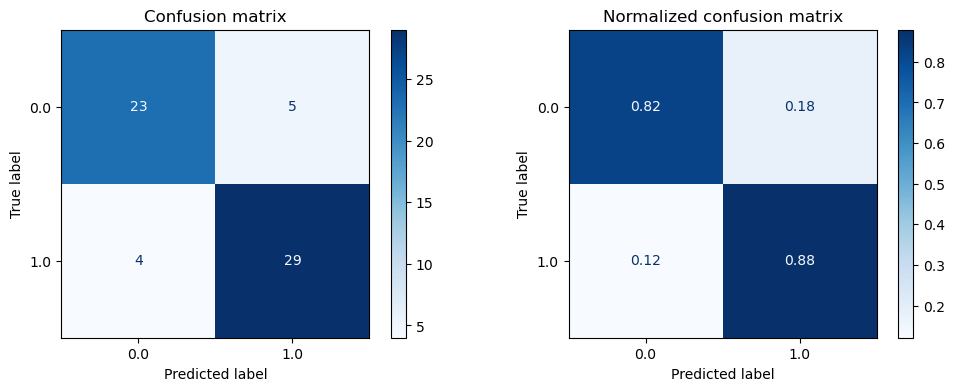

In [50]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

In [51]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Info] Number of positive: 131, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545833 -> initscore=0.183849
[LightGBM] [Info] Start training from score 0.183849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [52]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.7875,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.7875,1
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.7875,1
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.7875,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.7875,1
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.7875,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.7875,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.7875,1
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.7875,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.7875,1


In [53]:
lgbm = g_lgbm.best_estimator_

lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[23  5]
 [ 5 28]]
정확도: 0.8361, 정밀도: 0.8485, 재현율: 0.8485, F1: 0.8485, ROC-AUC: 0.8350
################################################################################


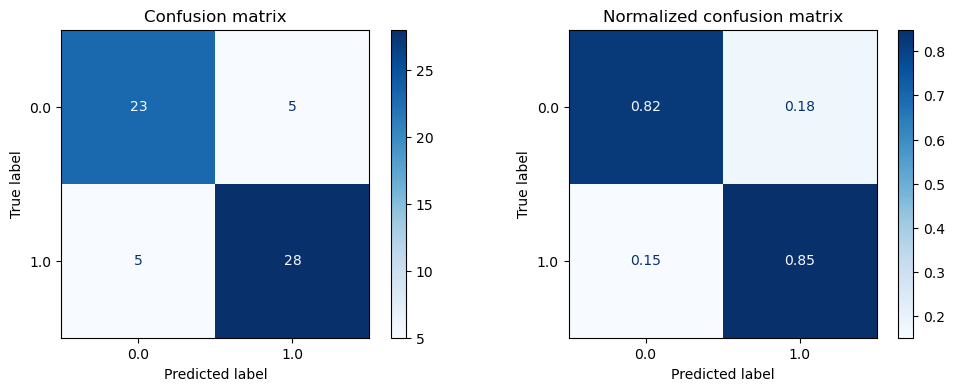

In [54]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = lda_df.iloc[:, :-1], lda_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)
logistic_r.fit(X_train, y_train)
logistic_prediction = logistic_r.predict(X_test)

오차 행렬
[[23  5]
 [ 1 32]]
정확도: 0.9016, 정밀도: 0.8649, 재현율: 0.9697, F1: 0.9143, ROC-AUC: 0.8956
################################################################################


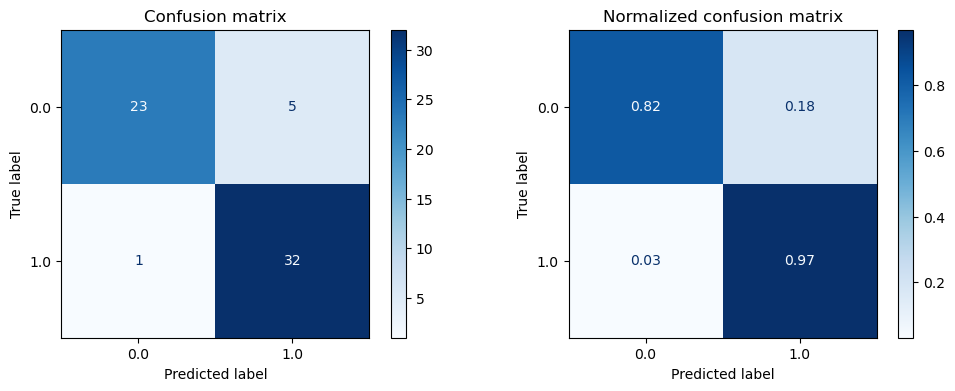

In [56]:
get_evaluation(y_test, logistic_prediction, logistic_r, X_test)

- Pytorch를 사용했을 때 보다 재현율이 살짝 낮아지고 다른 수치가 모두 조금씩 높아진 모습을 보인다

Model		Accuracy	Precision	Recall		F1 Score
rfc		0.9016		0.8649		0.9697		0.9143
gbc		0.7869		0.8333		0.7576		0.7937
xgb		0.8525		0.8529		0.8788		0.8657
lgbm		0.8361		0.8485		0.8485		0.8485
logist		0.9016		0.8649		0.9697		0.9143


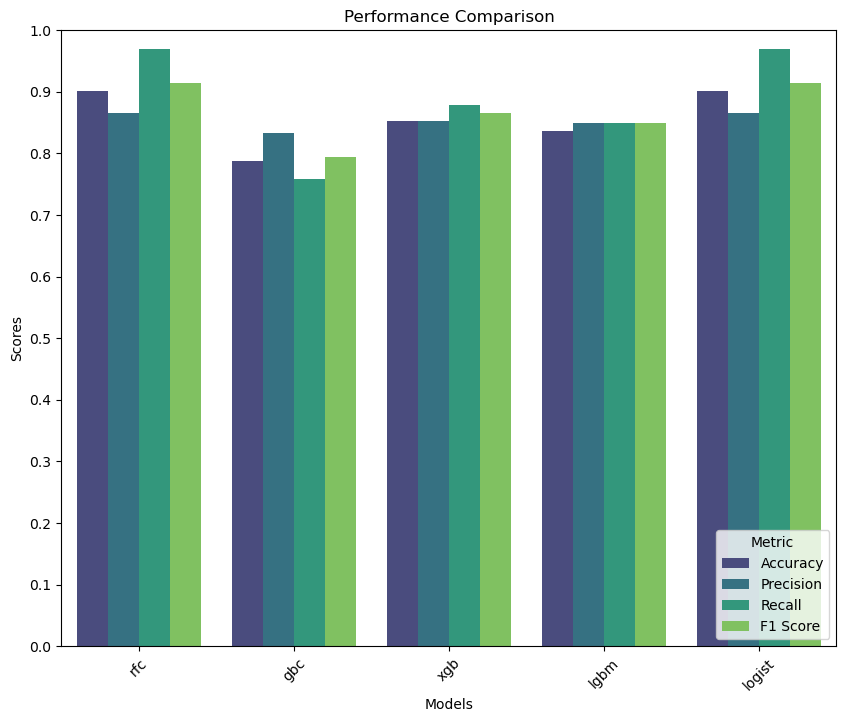

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['rfc', 'gbc', 'xgb', 'lgbm', 'logist']

accuracies = [accuracy_score(y_test, rfc_prediction), accuracy_score(y_test, gbc_prediction),
              accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction), accuracy_score(y_test, logistic_prediction)]

precisions = [precision_score(y_test, rfc_prediction), precision_score(y_test, gbc_prediction),
              precision_score(y_test, xgb_prediction), precision_score(y_test, lgbm_prediction), precision_score(y_test, logistic_prediction)]

recalls = [recall_score(y_test, rfc_prediction), recall_score(y_test, gbc_prediction),
           recall_score(y_test, xgb_prediction), recall_score(y_test, lgbm_prediction), recall_score(y_test, logistic_prediction)]

f1_scores = [f1_score(y_test, rfc_prediction), f1_score(y_test, gbc_prediction),
             f1_score(y_test, xgb_prediction), f1_score(y_test, lgbm_prediction), f1_score(y_test, logistic_prediction)]

# 성능 지표 출력
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{accuracies[i]:.4f}\t\t{precisions[i]:.4f}\t\t{recalls[i]:.4f}\t\t{f1_scores[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names * 4,
    'Metric': ['Accuracy'] * 5 + ['Precision'] * 5 + ['Recall'] * 5 + ['F1 Score'] * 5,
    'Score': accuracies + precisions + recalls + f1_scores
})

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=data, palette='viridis')
plt.title('Performance Comparison')
# X축 이름
plt.xlabel('Models')
# X축 각 항목 기울기
plt.xticks(rotation=45)
# Y축 이름
plt.ylabel('Scores')
# Y축 범위
plt.ylim(0, 1)
# Y축 범위 내 각 눈금
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# 범례
plt.legend(title='Metric', loc='lower right')
plt.show()

- logistic_regression의 성능이 가장 좋아 logistic으로 진행

In [58]:
# parameters = {
#     'n_estimators': [25, 50, 100, 150],
#     'learning_rate': [0.1, 0.3, 0.5, 0.7, 1]
# }

# X_val_train, X_val_test, y_val_train, y_val_test = \
# train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

# g_logistic_r = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
# g_logistic_r.fit(X_train, y_train, eval_set=evals)

In [59]:
# result_df = pd.DataFrame(g_logistic_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
# display(result_df)

In [60]:
# logistic = g_logistic_r.best_estimator_

# logistic_prediction = logistic.predict(X_test)

In [61]:
# get_evaluation(y_test, logistic_prediction, logistic, X_test)

#### 심장병 분류
> True Positive (TP): 모델이 심장병을 심장병으로 분류한 경우  
> False Positive (FP): 모델이 심장병을 정상으로 잘못 분류한 경우  
> True Negative (TN): 모델이 정상인을 정상으로 올바르게 분류한 경우  
> False Negative (FN): 모델이 정상인을 심장병으로 잘못 분류한 경우  

- 임계치를 높여 정밀도를 올려주는 것이 적합하다.
- 심장병 환자를 정상으로 판단하여 오진 시 문제가 생기지만, 정상인에게 조심하라고 하는건 별로 상관 없을 것 같기 때문이다.

In [62]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [63]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

In [75]:
from sklearn.preprocessing import Binarizer
# thresholds = [0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]

# threshold를 입력하여 입력받은 각각의 threshold를 binarizer를 통해 예측 확률을 만들어냅니다
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [76]:
proba_class1 = logistic_r.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.01111116, 0.01180415, 0.01580743, 0.02189088, 0.02355338,
       0.02533567, 0.03393055, 0.03891781, 0.03972837, 0.05662314,
       0.10098128, 0.10180377, 0.10188036, 0.11060559, 0.15805791,
       0.16065627, 0.22816274, 0.24684069, 0.26937095, 0.27905437,
       0.28125001, 0.33205219, 0.35832034, 0.48986066, 0.51051979,
       0.516955  , 0.57749548, 0.58342634, 0.58699076, 0.59713759,
       0.60570296, 0.61165411, 0.62839006, 0.66768672, 0.68229224,
       0.70298567, 0.70345229, 0.71223335, 0.75401828, 0.75800653,
       0.78407663, 0.83264221, 0.83379486, 0.84092174, 0.85175603,
       0.88545625, 0.89025804, 0.89330643, 0.89861727, 0.89923473,
       0.91255706, 0.91656193, 0.92103579, 0.92299432, 0.93022801,
       0.93448101, 0.95328714, 0.96292921, 0.96312691, 0.96866823,
       0.96884059])

In [77]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.011111159741578842
오차 행렬
[[ 1 27]
 [ 0 33]]
정확도: 0.5574, 정밀도: 0.5500, 재현율: 1.0000, F1: 0.7097, ROC-AUC: 0.5179
################################################################################
0.011804145748925722
오차 행렬
[[ 2 26]
 [ 0 33]]
정확도: 0.5738, 정밀도: 0.5593, 재현율: 1.0000, F1: 0.7174, ROC-AUC: 0.5357
################################################################################
0.015807426120137295
오차 행렬
[[ 3 25]
 [ 0 33]]
정확도: 0.5902, 정밀도: 0.5690, 재현율: 1.0000, F1: 0.7253, ROC-AUC: 0.5536
################################################################################
0.021890879527380537
오차 행렬
[[ 4 24]
 [ 0 33]]
정확도: 0.6066, 정밀도: 0.5789, 재현율: 1.0000, F1: 0.7333, ROC-AUC: 0.5714
################################################################################
0.02355337866395416
오차 행렬
[[ 5 23]
 [ 0 33]]
정확도: 0.6230, 정밀도: 0.5893, 재현율: 1.0000, F1: 0.7416, ROC-AUC: 0.5893
################################################################################
0.02533567046212933
오차 행렬
[[ 6 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# 조정
from sklearn.preprocessing import Binarizer

# 정밀도가 0.9를넘는 임계치
threshold = 0.6057029604334261

proba = logistic_r.predict_proba(X_test)
prediction = logistic_r.predict(X_test)

오차 행렬
[[25  3]
 [ 6 27]]
정확도: 0.8525, 정밀도: 0.9000, 재현율: 0.8182, F1: 0.8571, ROC-AUC: 0.8555
################################################################################


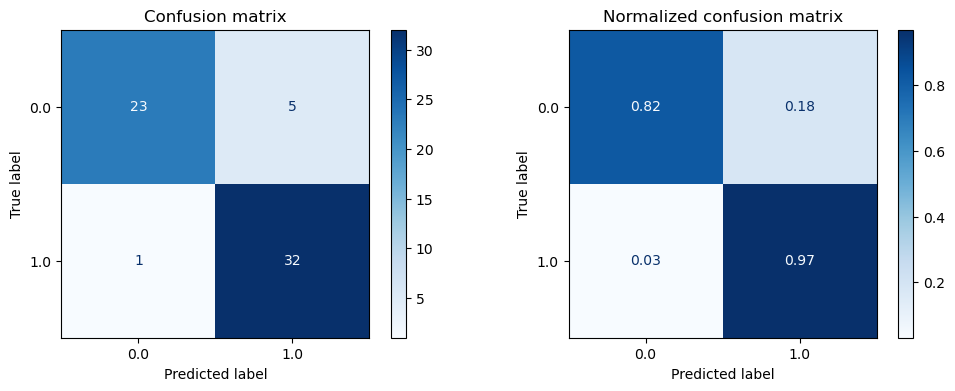

In [79]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction, logistic_r, X_test)

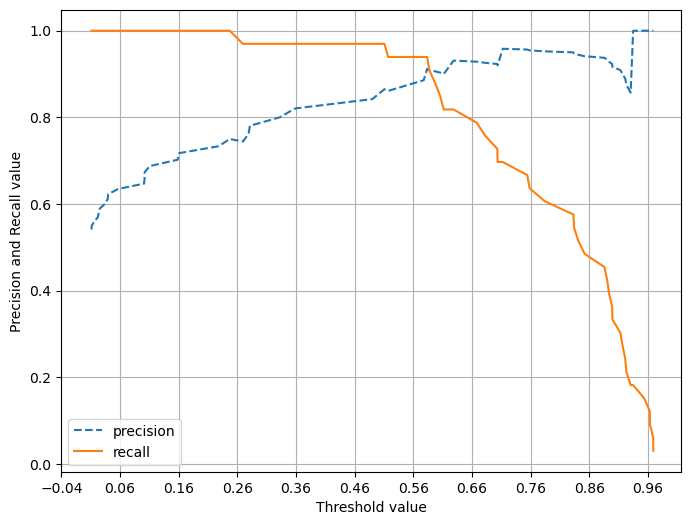

In [80]:
precision_recall_curve_plot(y_test, logistic_r.predict_proba(X_test)[:, 1].reshape(-1, 1))

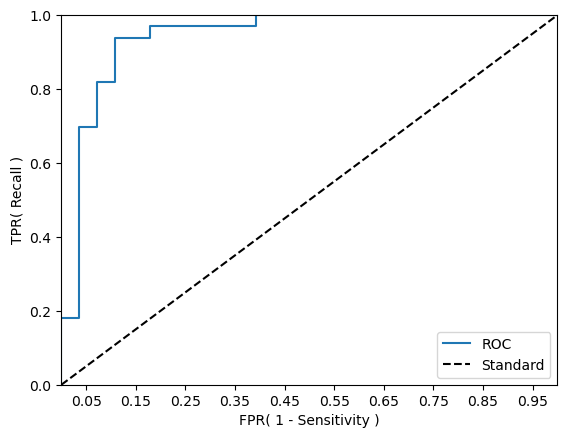

In [81]:
roc_curve_plot(y_test, logistic_r.predict_proba(X_test)[:, 1].reshape(-1, 1))